In [1]:
import pandas as pd

df = pd.read_csv('../data/hosp_rate.csv')

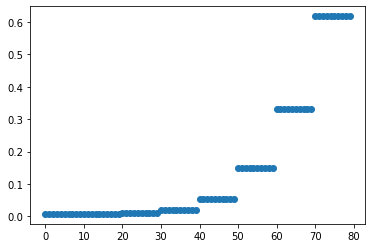

In [2]:
import matplotlib.pyplot as plt

hosp_probs = []
for i in range(80):
    hosp_probs.append(df['hosp_prob'][i // 10])
    
plt.scatter(list(range(80)), hosp_probs)

[-10.94003941   6.36278121]


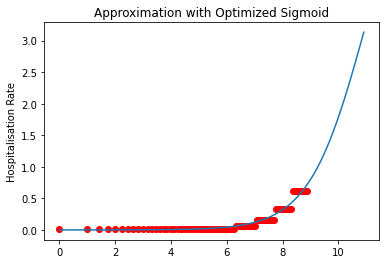

In [5]:
from scipy.optimize import curve_fit
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_to_optimize(x, a, b):
    return sigmoid(x + a) * b

x_vals = np.sqrt(list(range(80)))
y_vals = hosp_probs

popt, pcov = curve_fit(sigmoid_to_optimize, x_vals, y_vals)

print(popt)

y = sigmoid_to_optimize(np.sqrt(list(range(120))), popt[0], popt[1])

plt.scatter(x_vals, hosp_probs, color='red')
plt.plot(np.sqrt(list(range(120))), y)
plt.title('Approximation with Optimized Sigmoid')
plt.ylabel('Hospitalisation Rate')
plt.show()